Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate



In [12]:
os.chdir("../soheil")


heart = pd.read_csv('heart.csv')

In [13]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [15]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF7B84E748>,
      dtype=object)

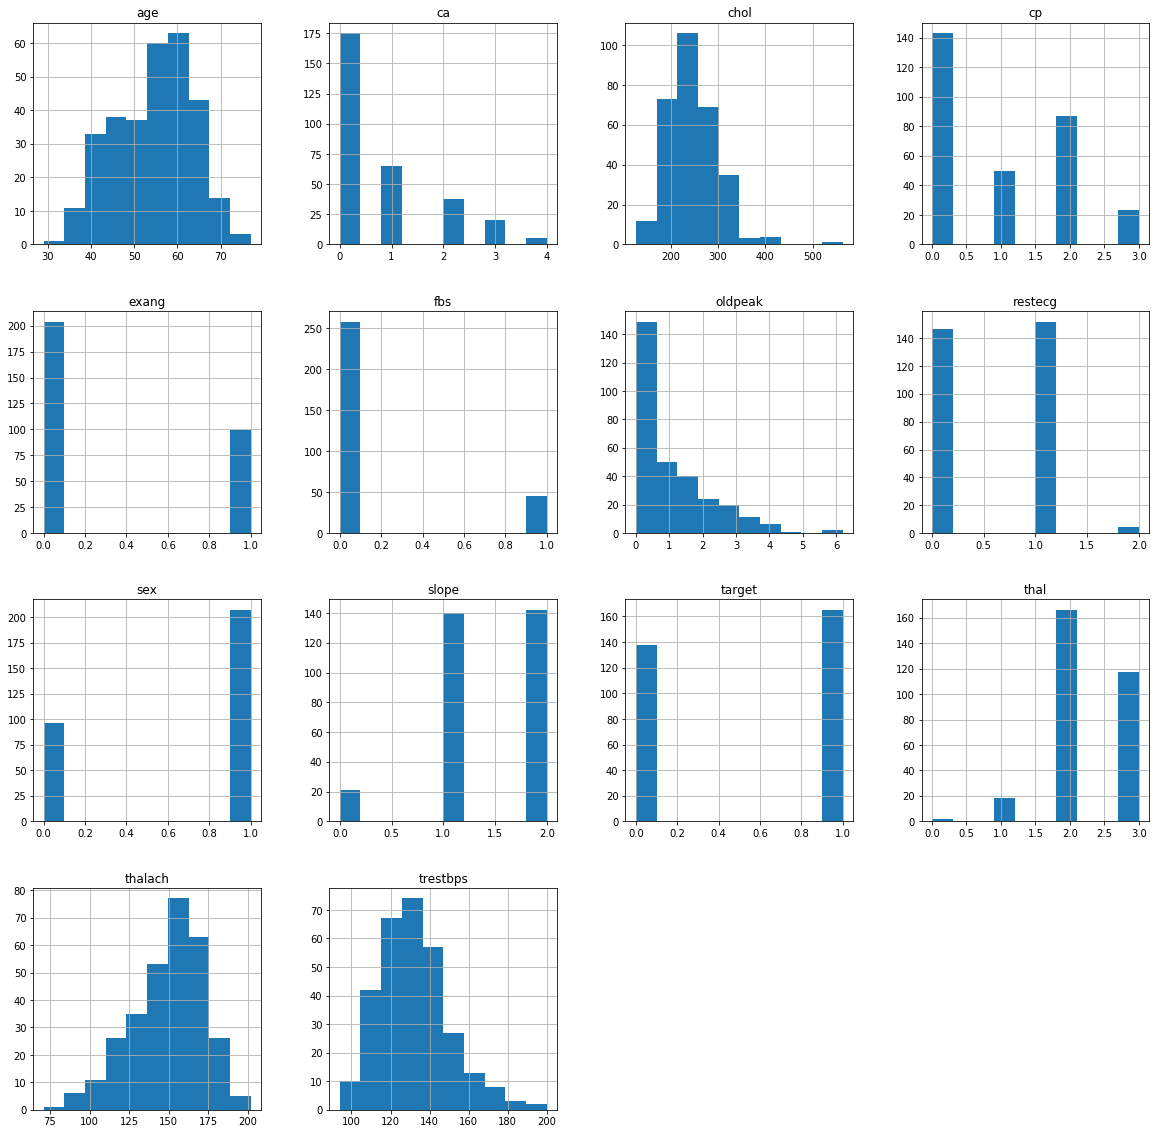

In [16]:
heart.hist(figsize=(20,20))

In [17]:
heart.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [18]:
(np.log1p(heart)).skew()

age        -0.576101
sex        -0.791335
cp          0.175129
trestbps    0.284837
chol        0.090242
fbs         1.986652
restecg     0.008907
thalach    -0.995243
exang       0.742532
oldpeak     0.396825
slope      -1.228858
ca          0.757752
thal       -1.603591
target     -0.179821
dtype: float64

In [19]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

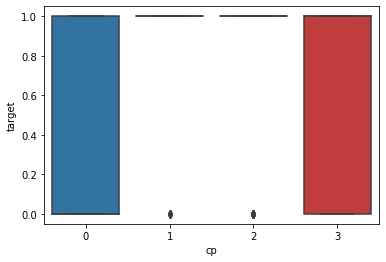

In [20]:
sns.boxplot(x="cp", y ='target', data=heart )

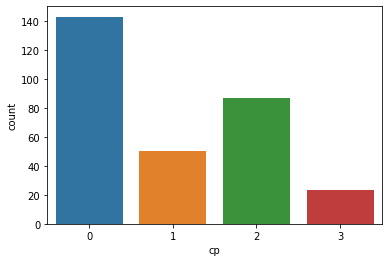

In [21]:
sns.countplot(x="cp", data=heart )

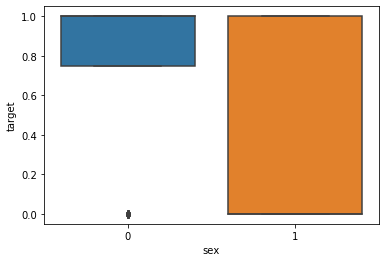

In [22]:
sns.boxplot(data=heart, x='sex',y= 'target')

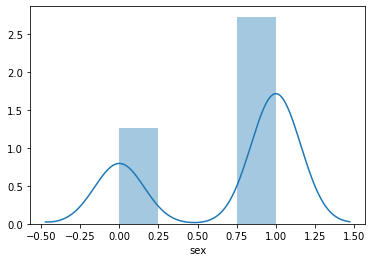

In [23]:
sns.distplot(heart['sex'])

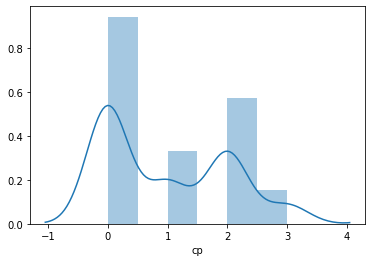

In [24]:
sns.distplot(heart['cp'])

In [25]:
heart.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

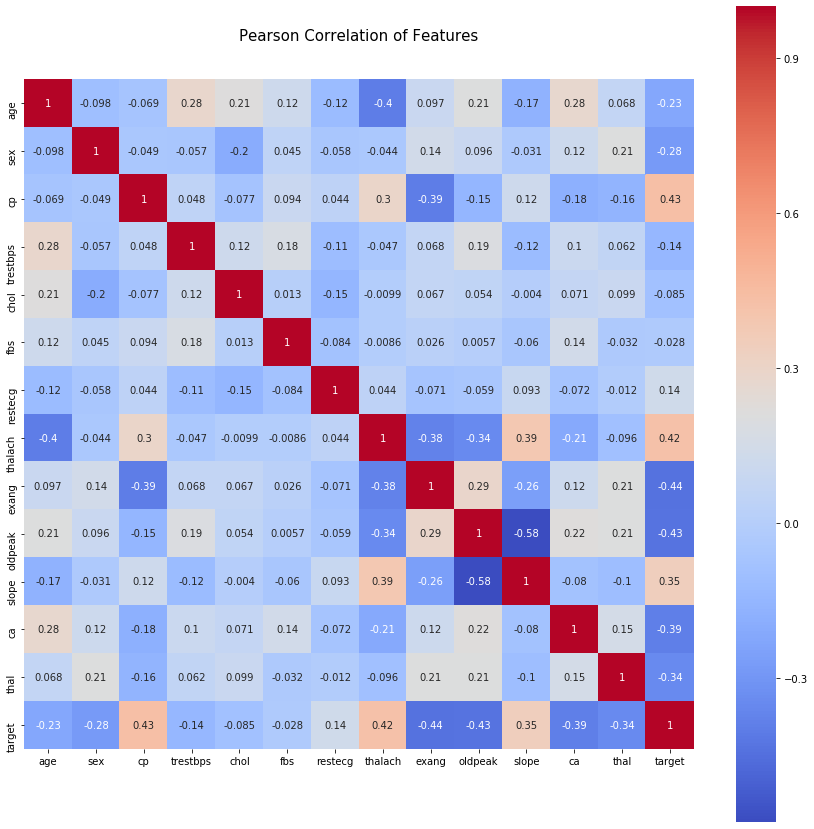

In [26]:
#Correlation Matrix
fig = plt.figure(figsize=[15,15])
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heart.corr(), annot = True, square=True,linecolor='white',cmap='coolwarm' )

In [27]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [28]:
y = heart['target']


In [29]:
heart.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [30]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [31]:
hea = heart.copy()

In [32]:
hea_dummy = pd.get_dummies(data=hea, columns= ['cp','fbs','restecg','exang','slope','ca','thal'], drop_first=True)

In [33]:
hea_dummy.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [34]:
hea_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [35]:
scaler = StandardScaler()
X_new_dummy = scaler.fit_transform(hea_dummy.drop(columns='target'))

In [36]:
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=100)).fit(X_new_dummy, y)
X_new_dummy = selector.transform(X_new_dummy)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new_dummy, y, test_size=0.2, random_state=42)

In [38]:
model ={'clf':DecisionTreeClassifier(max_depth=3,min_samples_leaf =10, random_state=0),
       'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
       'Logistic Regression': LogisticRegression(random_state=0),
      'Gaussian Naive': GaussianNB() }

In [39]:
for keys, items in model.items():
   # print(f"key {keys}\n")
   # print( items)
    print(f"cross validation scores: {keys.upper()} ")
    print(cross_val_score(items, X_new_dummy, y, cv=5),"\n")
    

cross validation scores: CLF 
[0.80327869 0.85245902 0.73770492 0.71666667 0.76666667] 

cross validation scores: RANDOM FOREST CLASSIFIER 
[0.7704918  0.7704918  0.75409836 0.71666667 0.78333333] 

cross validation scores: LOGISTIC REGRESSION 
[0.78688525 0.81967213 0.73770492 0.75       0.78333333] 

cross validation scores: GAUSSIAN NAIVE 
[0.7704918  0.83606557 0.7704918  0.75       0.76666667] 



In [40]:
model ={'clf':DecisionTreeClassifier(max_depth=3,min_samples_leaf =10, random_state=0),
       'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0),
       'Logistic Regression': LogisticRegression(random_state=0),
      'Gaussian Naive': GaussianNB() }

for keys, items in model.items():
    cv_results = cross_validate(items, X_new_dummy, y, cv=5, scoring=('r2', 'f1','precision','recall','roc_auc'))
    print("keys" + "  " + str(keys),"\n")
    print("Recall:  ", cv_results['test_recall'])
    print("Precision:  ", cv_results['test_precision'],"\n")
    print("AUC:  ", cv_results['test_roc_auc'])
    print("max AUC:  ", max(cv_results['test_roc_auc']),"\n")
    

keys  clf 

Recall:   [0.81818182 0.90909091 0.63636364 0.81818182 0.81818182]
Precision:   [0.81818182 0.83333333 0.84       0.71052632 0.77142857] 

AUC:   [0.85119048 0.875      0.82683983 0.75364759 0.81705948]
max AUC:   0.875 

keys  Random Forest Classifier 

Recall:   [0.78787879 0.87878788 0.75757576 0.84848485 0.84848485]
Precision:   [0.78787879 0.74358974 0.78125    0.7        0.77777778] 

AUC:   [0.85281385 0.9047619  0.8495671  0.80359147 0.84287318]
max AUC:   0.9047619047619048 

keys  Logistic Regression 

Recall:   [0.78787879 0.84848485 0.6969697  0.87878788 0.81818182]
Precision:   [0.8125     0.82352941 0.79310345 0.725      0.79411765] 

AUC:   [0.8474026  0.90151515 0.81926407 0.82716049 0.83613917]
max AUC:   0.9015151515151515 

keys  Gaussian Naive 

Recall:   [0.78787879 0.87878788 0.75757576 0.87878788 0.78787879]
Precision:   [0.78787879 0.82857143 0.80645161 0.725      0.78787879] 

AUC:   [0.82251082 0.90909091 0.8452381  0.84511785 0.84624018]
max AUC: 